In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [3]:
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [4]:
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


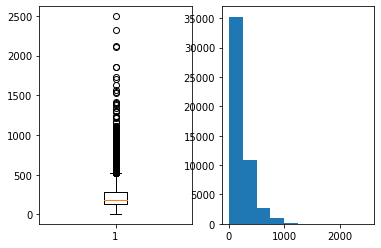

In [5]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

#**MLP**

In [6]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [7]:
seed = 7
numpy.random.seed(seed)
#Only Load the Top 5,000 words in the IMDB Review.
imdb.load_data(num_words=5000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [8]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [9]:
#The output of this first layer would be a matrix with the size 32 * 500 for
Embedding(5000, 32, input_length=500)

In [24]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
seed = 7
numpy.random.seed(seed)
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1)
# Final evaluation of the model
scores_MLP = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy with MLP: %.2f%%" % (scores_MLP[1]*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 32)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_4 (Dense)             (None, 250)               4000250   
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
782/782 [==============================] - 46s 58ms/step - loss: 0.3890 - accuracy: 0.8096 - val_loss: 0.2930 - val_accuracy: 0.8765
Epoch 2/2
782/782 [=========

#**CNN-1D**

In [27]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [28]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [29]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length= max_words))
model.add(Convolution1D(filters=32, kernel_size=3, padding= 'same' ,activation= 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

In [30]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8000)              0         
                                                                 
 dense_8 (Dense)             (None, 250)               2000250   
                                                                 
 dense_9 (Dense)             (None, 1)                 251       
                                                      

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, verbose=1)

Epoch 1/2
782/782 [==============================] - 45s 56ms/step - loss: 0.3681 - accuracy: 0.8203 - val_loss: 0.2761 - val_accuracy: 0.8844
Epoch 2/2
782/782 [==============================] - 50s 63ms/step - loss: 0.1964 - accuracy: 0.9237 - val_loss: 0.2923 - val_accuracy: 0.8801


In [32]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy with CNN: %.2f%%" % (scores[1]*100))

Accuracy with CNN: 88.01%


In [1]:
#